<a href="https://colab.research.google.com/github/David-Junior/Undergrad-Lab-Data-Analysis/blob/main/FMM3_221_Thermodynamics_1_Bomb_Calorimeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

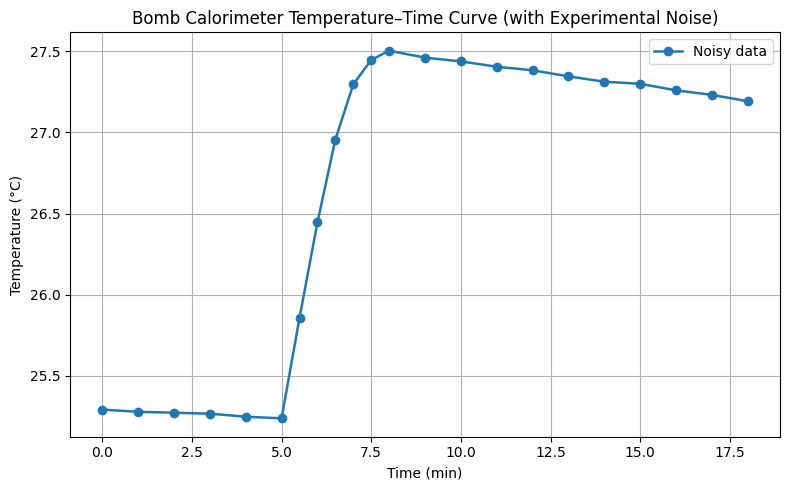

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # reproducibility

# -----------------------------
# Base (noise-free) data
# -----------------------------

t1 = np.array([0, 1, 2, 3, 4, 5])
T1 = np.array([25.29, 25.28, 25.27, 25.26, 25.25, 25.24])

t2 = np.array([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])
T2 = np.array([25.24, 25.85, 26.45, 26.95, 27.30, 27.45, 27.50])

t3 = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
T3 = np.array([27.50, 27.47, 27.44, 27.41, 27.38, 27.35,
               27.32, 27.29, 27.26, 27.23, 27.20])

# -----------------------------
# Add realistic experimental noise
# -----------------------------
# Small noise before ignition, slightly larger during combustion,
# moderate noise during cooling

noise1 = np.random.normal(0, 0.005, size=T1.size)   # ±0.005 °C
noise2 = np.random.normal(0, 0.010, size=T2.size)   # ±0.01 °C
noise3 = np.random.normal(0, 0.006, size=T3.size)   # ±0.006 °C

T1n = T1 + noise1
T2n = T2 + noise2
T3n = T3 + noise3

# Ensure monotonic behavior is preserved where physically required
T1n = np.minimum.accumulate(T1n)          # slight cooling
T3n = np.maximum.accumulate(T3n[::-1])[::-1]  # cooling after peak

# Combine full dataset
t = np.concatenate([t1, t2[1:], t3[1:]])
T = np.concatenate([T1n, T2n[1:], T3n[1:]])

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(t, T, marker='o', linewidth=1.8, label="Noisy data")

plt.xlabel("Time (min)")
plt.ylabel("Temperature (°C)")
plt.title("Bomb Calorimeter Temperature–Time Curve (with Experimental Noise)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

# -----------------------------
# Time (min) and base temperature (°C)
# -----------------------------
t1 = np.array([0, 1, 2, 3, 4, 5])
T1 = np.array([25.29, 25.28, 25.27, 25.26, 25.25, 25.24])

t2 = np.array([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])
T2 = np.array([25.24, 25.85, 26.45, 26.95, 27.30, 27.45, 27.50])

t3 = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
T3 = np.array([27.50, 27.47, 27.44, 27.41, 27.38, 27.35,
               27.32, 27.29, 27.26, 27.23, 27.20])

# -----------------------------
# Add experimental noise
# -----------------------------
noise1 = np.random.normal(0, 0.0055, size=T1.size)
noise2 = np.random.normal(0, 0.010, size=T2.size)
noise3 = np.random.normal(0, 0.0065, size=T3.size)

T1n = np.minimum.accumulate(T1 + noise1)
T2n = T2 + noise2
T3n = np.maximum.accumulate((T3 + noise3)[::-1])[::-1]

# -----------------------------
# Combine data
# -----------------------------
time = np.concatenate([t1, t2[1:], t3[1:]])
temperature = np.concatenate([T1n, T2n[1:], T3n[1:]])

# -----------------------------
# Create pandas DataFrame
# -----------------------------
df = pd.DataFrame({
    "Time (min)": time,
    "Temperature (°C)": temperature
})

# Optional: round to realistic thermometer resolution
df["Temperature (°C)"] = df["Temperature (°C)"].round(2)

print(df)


    Time (min)  Temperature (°C)
0          0.0             25.29
1          1.0             25.28
2          2.0             25.27
3          3.0             25.27
4          4.0             25.25
5          5.0             25.24
6          5.5             25.86
7          6.0             26.45
8          6.5             26.96
9          7.0             27.30
10         7.5             27.45
11         8.0             27.50
12         9.0             27.46
13        10.0             27.44
14        11.0             27.40
15        12.0             27.38
16        13.0             27.34
17        14.0             27.31
18        15.0             27.30
19        16.0             27.26
20        17.0             27.23
21        18.0             27.19


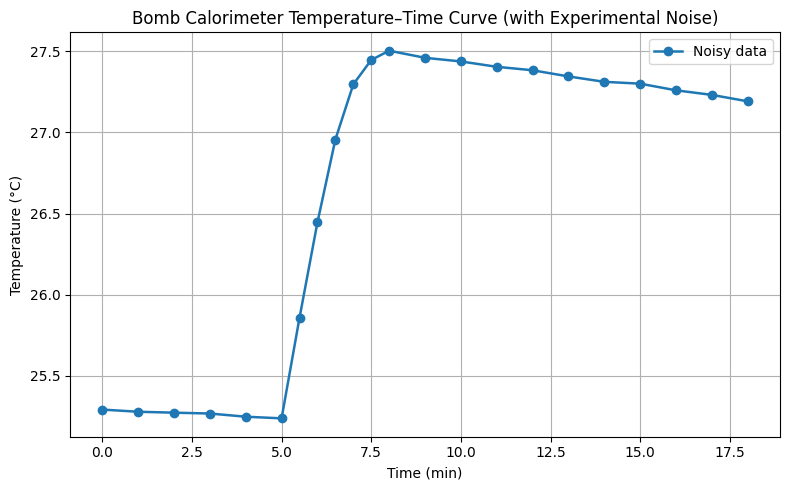

In [ ]:
# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(time, temperature, marker='o', linewidth=1.8, label="Noisy data")

plt.xlabel("Time (min)")
plt.ylabel("Temperature (°C)")
plt.title("Bomb Calorimeter Temperature–Time Curve (with Experimental Noise)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()